In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [4]:
# Read training data and verify contents
training_df = pd.read_csv('train_LZV4RXX.csv')
training_df.head(3)

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1


In [ ]:
training_df.columns

In [5]:
# Remove unnecessary columns and set output column
input_df, target_column = training_df.drop(columns=['loan_id', 'loan_default']), training_df['loan_default']

In [6]:
input_df.describe()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
count,7000.000000,6755.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000
mean,36.096571,1.561954,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286
std,7.587700,0.496184,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504
min,21.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000
25%,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000
50%,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000
75%,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000
max,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000


In [7]:
input_df['education'].value_counts()

,count
education,
2.0,3796
1.0,2959


In [8]:
# Find mean and median of education
input_df['education'].mean(), input_df['education'].median()

(np.float64(1.5619541080680976), 2.0)

<Axes: xlabel='education', ylabel='Density'>

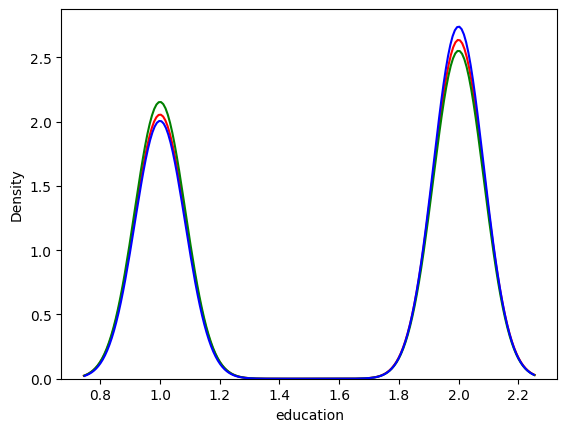

In [9]:
# Check the distribution of values in education column using kdeplot

sns.kdeplot(input_df['education'], color='red')
sns.kdeplot(input_df['education'].fillna(1), color='green')
sns.kdeplot(input_df['education'].fillna(2), color='blue')

In [10]:
## Scaling num columns
numeric_columns = input_df.select_dtypes(include=np.number).columns.to_list()

scaler = StandardScaler()
scaler = scaler.fit(input_df[numeric_columns])
input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])
input_df.sample(3)

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
381,1.700693,0.882896,Aadhar,-0.115000,-0.322905,0.575106,0.744069,-0.116037
6422,0.382677,-1.132637,VoterID,0.659462,0.155076,-0.521478,-0.626344,-0.116037
5614,1.173487,-1.132637,Aadhar,1.124476,0.112554,-0.521478,-0.626344,-0.116037


In [12]:
# replace  education values to string type

input_df['education'] = input_df['education'].astype(str)

# set nan values to 2.0 since it is the most frequent
input_df['education'] = input_df['education'].apply(lambda x: str(2.0) if x == 'nan' else x)

In [13]:
## Encoding Categoric columns using One Hot Encoding
categoric_columns = input_df.select_dtypes(exclude=np.number).columns.to_list()

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop=None, dtype=np.int32, sparse_output=False)
encoder = encoder.fit(input_df[categoric_columns])
encoded_features = list(encoder.get_feature_names_out())
input_df[encoded_features] = encoder.transform(input_df[categoric_columns])
input_df[encoded_features].sample(3)



,education_-1.1326366730120063,education_0.8828956573873886,education_2.0,proof_submitted_Aadhar,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID
6787,0,1,0,1,0,0,0,0
259,0,1,0,1,0,0,0,0
2798,0,1,0,0,0,0,0,1


In [14]:
# Train the data

X_train, X_test, y_train, y_test = train_test_split(input_df[numeric_columns + encoded_features + ["education"]], target_column, test_size=0.2)



In [15]:
from sklearn.ensemble import RandomForestClassifier

# train data using RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=350, max_depth=6, oob_score=True, bootstrap=True, min_samples_split=32, min_samples_leaf=15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [16]:
# check score

rfc.oob_score_

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred) * 100

61.07142857142858